# Orthgonal Projections, QR-factorization of a matrix and least-squares solutions

In this tutorial, we will cover three topics: Orthgonal Projections, QR-factorization of a matrix and least-squares solutions. In each part, I will first give the linear algebra foundation by using an example and then generalize the code so that we can use it in other problems as well. For the linear algebraic theoretical part here and for more details on this topic, you may want to look at Section 5.4 in Bretscher's Linear Algebra textbook.

## Part I: Orthogonal Projections

In the first part of this tutorial, we will cover orthogonal projection of a vector onto a subspace $V$ of ${\mathbb R^n}$ with an orthonormal basis ${\frak B}=\{{\mathbf u}_1,{\mathbf u}_2,\ldots,{\mathbf u}_m\}$. So, the projection $proj_V({\mathbf x})$ of a vector ${\mathbf x}$ is computed as

$$proj_V({\mathbf x})=({\mathbf x}\cdot {\mathbf u}_1){\mathbf u}_1+({\mathbf x}\cdot {\mathbf u}_2){\mathbf u}_2+\ldots+({\mathbf x}\cdot {\mathbf u}_m){\mathbf u}_m.$$

Recall that a set of vectors $\{{\mathbf u}_1,{\mathbf u}_2,\ldots,{\mathbf u}_m\}$ is called orthonormal if they are unit vectors that are orthogonal to each other.

### Example:

For simplicity, let's consider a 2 dimensional subspace $V$ of ${\mathbb R^3}$ with basis ${\frak B}_1=\{{\mathbf v}_1,{\mathbf v}_2\}$ where  ${\mathbf v}_1=\begin{bmatrix}1 \\ 2 \\ -1\end{bmatrix}$ and ${\mathbf v}_2=\begin{bmatrix} -2 \\ 1 \\ 0\end{bmatrix}$. 

We want to obtain the orthogonal projection of vector ${\mathbf x}=\begin{bmatrix} -4 \\ 3 \\ 5\end{bmatrix}$ onto the subspace $V$.

Note that vectors ${\mathbf v}_1$ and ${\mathbf v}_2$ are orthogonal (i.e., their dot product is zero) but they are not unit vectors. In this case, orthogonality condition is satisfied and it is easy to obtain the orthonormal basis ${\frak B}_2=\{{\mathbf u}_1,{\mathbf u}_2\}$ by normalizing ${\mathbf v}_1$ and ${\mathbf v}_2$.

Let's first import packages that we need for this part.

In [1]:
import numpy as np
import scipy.linalg as la

We check orthogonality:

In [2]:
v_1=np.array([1,2,-1])
v_2=np.array([-2,1,0])
x=np.array([-4,3,5])

#given basis
B_1=[v_1,v_2]

np.dot(v_1,v_2)

0

Next, we will find the unit vectors in the directions of ${\mathbf v}_1$ and ${\mathbf v}_2$ to obtain ${\mathbf u}_1$ and ${\mathbf u}_2$. For this, we need to compute length of vectors.

In [3]:
#define length function
def length(v):
    sq_total=0
    for i in range(0,len(v)):
        sq_total +=v[i]**2     #each component is squared and added to the total
    return np.sqrt(sq_total)   #compute its square root by np.sqrt()

#first have an empty list for orthonormal basis B_2
B_2=[]

for vector in B_1:
    vector_length=length(vector)
    u=(1/vector_length)*vector
    B_2.append(u)
    
#orthonormal basis
B_2


[array([ 0.40824829,  0.81649658, -0.40824829]),
 array([-0.89442719,  0.4472136 ,  0.        ])]

Next, we will compute the orthogonal projection of ${\mathbf x}$ by using orthonormal basis $B_2$.

In [4]:
def proj(basis,x):
    proj=0
    for i in range(0,len(basis)):
        dot=np.dot(basis[i],x)
        comp=dot*basis[i]
        proj+=comp
    return proj
        
proj(B_2,x)


array([-4.9,  1.2,  0.5])

## Part II: QR - Factorization

In Part I, we see that if vectors in a basis are orthogonal, it is easy to find an orthonormal basis for the subspace and use that basis to compute the orthogonal projection of a given vector.  

If vectors in a basis are not orthogonal, we can apply Gram-Schmidt orthogonalization process to obtain an orthonormal basis. This is a lengthy process and we can certainly write a code for it. However, here I will intoduce a simple shortcut by using the QR-factorization. 

In class, we saw that if columns of a given matrix $A$ are linearly independent, we can compute its $QR-factorization$ where columns of $Q$ are orthonormal vectors and $R$ is an upper triangular matrix. Since columns of $A$ are linearly independent, they form a basis for image $im(A)$. Therefore, columns of $Q$ form an orthonormal basis for $im(A)$ and we can use this basis to compute an orthogonal projection of a given vector. 

In scipy.linalg module, QR-factorization is just scipy.linalg.qr(). (For the documentation, please visit https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.linalg.qr.html) However, before we use this code, we will construct the matrix by using its transpose. For example, np.array([v_1,v_2]) produces the matrix with rows v_1,v_2, not columns. Since $(A^T)^T=A$ for any matrix, we will first write $A^T$ and then take transpose of this matrix to find $A$, whose columns are vectors v_1, v_2. Let's solve the problem above with this approach.

In [5]:
#v_1=np.array([1,2,-1])
#v_2=np.array([-2,1,0])
#x=np.array([-4,3,5])
#given basis
#B_1=[v_1,v_2]

A_T=np.array([v_1,v_2])

print('This is transpose:\n {}'.format(A_T))

A=np.transpose(A_T)

print('Matrix A is:\n {}'.format(A))

This is transpose:
 [[ 1  2 -1]
 [-2  1  0]]
Matrix A is:
 [[ 1 -2]
 [ 2  1]
 [-1  0]]


In the QR-factorization code, we will use 'economic' as its mode to produce the result in the form that we saw in class.

In [6]:
la.qr(A,mode='economic')

(array([[-4.08248290e-01,  8.94427191e-01],
        [-8.16496581e-01, -4.47213595e-01],
        [ 4.08248290e-01, -7.06140940e-17]]),
 array([[-2.44948974,  0.        ],
        [ 0.        , -2.23606798]]))

The first matrix given in this tuple is $Q$ and the second one is $R$. 

In [7]:
Q=la.qr(A,mode='economic')[0]

print(Q)

[[-4.08248290e-01  8.94427191e-01]
 [-8.16496581e-01 -4.47213595e-01]
 [ 4.08248290e-01 -7.06140940e-17]]


Now, we want to get the columns of $Q$ as arrays. Therefore, we will first find its transpose and then get the components and store them in the basis list $B$.

In [8]:
Q_T=np.transpose(Q)

u_1=Q_T[0]
u_2=Q_T[1]

B=[u_1,u_2]

B

[array([-0.40824829, -0.81649658,  0.40824829]),
 array([ 8.94427191e-01, -4.47213595e-01, -7.06140940e-17])]

This is the same set that we found in Part I.

Now, let's compute orthogonal projection of ${\mathbf x}$ (given in Part I) onto the subspace $V$.

In [9]:
proj(B,x)

array([-4.9,  1.2,  0.5])

This is the same answer by using QR-factorization method.

### A function for computing orthogonal projections using QR-factorization

Now, lets write the function proj_by_qr that take a basis set ${\frak B}$ and vector ${\mathbb x}$ as input and gives the projection of ${\mathbb x}$ onto the subspace with basis ${\frak B}$.

In [10]:
def proj_by_qr(B,x):
    for i in range(0,len(B)):
        A_T=B[0]
        A_T=np.append([A_T],[B[i]],axis=0)
    A=np.transpose(A_T)
    QR_factorization=la.qr(A,mode='economic')
    Q=QR_factorization[0]
    Q_T=np.transpose(Q)
    #print(Q)
    orthonormal_basis=[]
    for i in range(0,len(Q_T)):
        orthonormal_basis.append(Q_T[i]) 
    return proj(orthonormal_basis,x)



Let's check our code with the vectors v_1, v_2 given in Part I.

In [11]:
Basis=[v_1,v_2]

proj_by_qr(Basis,x)

array([-4.9,  1.2,  0.5])

### Example:

Note that this works with more vectors and more dimensions, as well. To keep this tutorial brief, we are only working with linearly independent vectors. You can even add more to check linear independence before computing the projection.

In [12]:
w_1=np.array([1,2,-1,0,5])
w_2=np.array([0,1,-2,0,-2])
w_3=np.array([1,2,0,2,-1])

x_3=np.array([3,5,4,4,8])

B_3=[w_1,w_2,w_3]

proj_by_qr(B_3,x_3)

array([ 2.88064516,  5.76129032, -1.58064516,  2.6       ,  6.60322581])

## Part III: Least squares solutions and best fitting linear model to a given dataset

In this section, we will cover the least squares solution to a system of equations given as $A{\mathbf x}={\mathbf b}$, where $A$ is an $m\times n$ matrix. This is especially useful when the system is inconsistent, i.e., it doesn't have a solution. In this case, the next best thing is finding a solution that is closest to this. 

Here, we will be looking for a solution ${\mathbf x^*}$ such that ${\mathbf b}-A{\mathbf x^*}$ minimizes the difference ${\mathbf b}-A{\mathbf x}$ as much as possible. For this we will try to minimize the length $\|{\mathbf b}-A{\mathbf x}\|$. This brings us to the definition of the least squares solution:

${\textbf{Definition:}}$ The least squares solution ${\mathbf x^*}$ to the system $A{\mathbf x}={\mathbf b}$ is the vector ${\mathbf x^*}\in{\mathbb R}^n$ satisfying

$$\|{\mathbf b}-A{\mathbf x^*}\|\leq \|{\mathbf b}-A{\mathbf x}\|\quad\mbox{for all}\quad{\mathbf x}\in{\mathbb R}^n.$$


Note that $A{\mathbf x^*}\in im(A)$. Therefore, we can consider $A{\mathbf x^*}=proj_V({\mathbf b})$, i.e., orthogonal projection of ${\mathbf b}$ onto the subspace $im(A)$. Thus, $b-A{\mathbf x^*}\in (im(A))^{\perp}$. But  since $(im(A))^{\perp}=Ker(A^T)$, we have 

$$b-A{\mathbf x^*}\in Ker(A^T)\;\;\Rightarrow\;\; A^T(b-A{\mathbf x^*})={\mathbf 0}.$$
This implies that ${\mathbf x^*}$ is the solution of the system 

$$A^TA{\mathbf x^*}=A^T{\mathbf b}.$$

So, what is the practical application of this? This approach is very useful when we are trying to find a model for some given data. To make this tutorial concise, we will focus on a linear model, but in a similar approach we could find the best fitting polynomials or another curve to a given data.

### Example:

Let's find the best fitting least square model fitting the data given as below. 

data=[(1,4),(1.5,3),(2,3),(2.2,3.8),(3,4.5),(3.5,7),(3.8,9),(5,8),(7.5,7),(8.8,41)]

Before, we find the best fitting linear model, we will first plot the points in this dataset and see what we have. For this we need to import matplotlib.pyplot module as plt. From that module, we will be using plt.scatter() to produce dot plot of our data. 

In [13]:
import matplotlib.pyplot as plt

data=[(1,4),(1.5,3),(2,3),(2.2,3.8),(3,4.5),(3.5,7),(3.8,9),(5,8),(7.5,7),(8.8,41)]

#create x values and y values
x_values=[]
y_values=[]

for v in data:
    x=v[0]
    x_values.append(x)
    y=v[1]
    y_values.append(y)

#plotting dataset by using scatterplot
plt.scatter(x_values,y_values)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('raw data')

plt.show()

<Figure size 640x480 with 1 Axes>

Linear model fitting this data is given as $y=c_0+c_1x$, where $c_0$ is the intercept and $c_1$ is the coefficient. Therefore, the corresponding system is $A{\mathbf x}={\mathbf b}$ where
$A=\begin{bmatrix}1 & 1\\
1&1.5\\
1&2\\
1&2.2\\
1&3\\
1&3.5\\
1&3.8\\
1&5\\
1&7.5\\
1&8.8\\
\end{bmatrix}$ and 
${\mathbf b}=\begin{bmatrix}4\\3\\3\\3.8\\4.5\\7\\9\\8\\7\\41\end{bmatrix}$.

In [14]:
#Create matrix A and vector b in the following way

A_list=[]
b_list=[]

for v in range(0,len(data)):
    x=data[v][0]
    A_list.append(np.array([1,x]))
    b_list.append(data[v][1])

A=np.array(A_list)
b=np.array(b_list)
print('Matrix A is {} and vector b is {}'.format(A,b))


Matrix A is [[1.  1. ]
 [1.  1.5]
 [1.  2. ]
 [1.  2.2]
 [1.  3. ]
 [1.  3.5]
 [1.  3.8]
 [1.  5. ]
 [1.  7.5]
 [1.  8.8]] and vector b is [ 4.   3.   3.   3.8  4.5  7.   9.   8.   7.  41. ]


To find the least squares solution $x^*$, we will solve the system $A^TA{\mathbf x}=A^T{\mathbf b}$.

In [15]:
A_T=np.transpose(A)
new_b=np.dot(A_T,b)
new_A=np.dot(A_T,A)

la.solve(new_A,new_b)


array([-3.94430839,  3.38754788])

So, the least-squares solution gives us $c_0$ and $c_1$ in the model. Therefore, the best fitting linear model to this data is $y=-3.94430839+3.38754788x$.

Let's plot points and the linear model on the same graph.

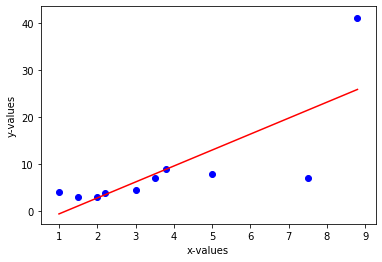

In [16]:
c=la.solve(new_A,new_b)

x_star=[]

for i in range(0,len(data)):
    x=data[i][0]
    new_y=c[0]+c[1]*x
    x_star.append(new_y)

plt.plot(x_values,x_star,color='red')
plt.scatter(x_values,y_values,color='blue')
plt.xlabel('x-values')
plt.ylabel('y-values')

plt.show()

Notice that, the point $(8.8,41)$ has the highest y-value in the dataset and according to this plot, the model is trying to fit into that point as well. Let's look at the model without that point.

In [17]:
modified_data=data=[(1,4),(1.5,3),(2,3),(2.2,3.8),(3,4.5),(3.5,7),(3.8,9),(5,8),(7.5,7)]

A_list2=[]
b_list2=[]
for v in range(0,len(modified_data)):
    x=modified_data[v][0]
    A_list2.append(np.array([1,x]))
    b_list2.append(modified_data[v][1])


A2=np.array(A_list2)
b2=np.array(b_list2)
print('Matrix A2 is {} and vector b2 is {}'.format(A2,b2))    
    
A2_T=np.transpose(A2)
new_b2=np.dot(A2_T,b2)
new_A2=np.dot(A2_T,A2)

c2=la.solve(new_A2,new_b2)

x_star2=[]

for i in range(0,len(modified_data)):
    x=modified_data[i][0]
    new_y2=c2[0]+c2[1]*x
    x_star2.append(new_y2)


Matrix A2 is [[1.  1. ]
 [1.  1.5]
 [1.  2. ]
 [1.  2.2]
 [1.  3. ]
 [1.  3.5]
 [1.  3.8]
 [1.  5. ]
 [1.  7.5]] and vector b2 is [4.  3.  3.  3.8 4.5 7.  9.  8.  7. ]


Let's plot both models side by side so that we see differences and similarities. To create two plots side by side horizontally, we will be using the code 

fig,(ax1,ax2)=plt.subplots(1,2)

This tells us that there will be 1 row and 2 columns in our plot. In addition, we will use ax1 for axes of the old plot while using ax2 for the new plot. (To produce plots horizontally aligned, use fig,(ax1,ax2)=plt.subplots(2,1))

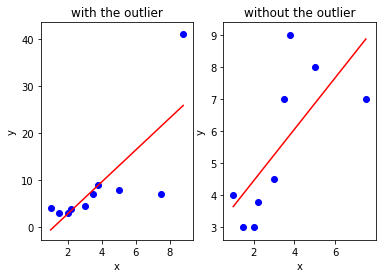

In [18]:
x2_values=[]
y2_values=[]

for v in modified_data:
    x=v[0]
    x2_values.append(x)
    y=v[1]
    y2_values.append(y)    

#Creating two plots side by side
fig,(ax1,ax2)=plt.subplots(1,2)

#old model on the left, with the outlier
ax1.plot(x_values,x_star,color='red')
ax1.scatter(x_values,y_values,color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('with the outlier')
    
#new model on the right, without the outlier
ax2.plot(x2_values,x_star2,color='red')
ax2.scatter(x2_values,y2_values,color='blue')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('without the outlier')

plt.show()

This shows that all new y-values are less than 10 while old model gave values more than 10 to the last three points.  

In [19]:
print('Old model values: {}'.format(x_star)) 
print('........................')
print('New model values: {}'.format(x_star2))

Old model values: [-0.5567605091918764, 1.1370134323614591, 2.830787373914794, 3.5082969505361286, 6.218335257021465, 7.9121091985748, 8.928373563506801, 12.993431023234807, 21.462300731001484, 25.866112979040153]
........................
New model values: [3.648714864957733, 4.050216479967011, 4.45171809497629, 4.61231874098, 5.254721324994845, 5.656222940004123, 5.897123909009689, 6.860727785031957, 8.868235860078347]


### Finding the linear model by using machine learning package sklearn

As in Part II, we could combine all our code into a function so that we could use it for other models. However, there is a very convenient way of doing that by using the machine learning package sklearn. 

Here is the a very general way of creating models in this way. Note that in real life, an exploratory data analysis (EDA) is needed to determine the best approach about your data. 

<ol>
<li>import tools needed. Here we will import LinearRegression from sklearn.linear_model.</li>
<li>Preprocess and clean data for use. (This is very important step to have a good model)</li>
<li>Split data into train and test subsets by using train_test_split from sklearn.model_selection (training data is used to train the model and test is used to test model efficiency)</li>
<li>Fit the model to the training set.</li>
<li>Find predicted values.</li>
<li>Measure model efficiency by using several metrics and scores.</li>
<li>Improve the model, if necessary.</li>
<li>You may even consider other linear models to improve your model. Each model has its own strength and weaknesses. If you are interested in learning all these models, you may want to take a course in Machine Learning.</li>
</ol>

Documentation links:

Linear Models: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.linear_model 

Metrics: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.metrics

Split data into training and test subsets: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split


In [20]:
from sklearn.linear_model import LinearRegression

#define training values
X_train=x_values
y_train=y_values
X_train=np.reshape(X_train,(10,1))   #we needed to reshape x-values

#define the model
lr=LinearRegression()  

#fit the model to the data
lin_model=lr.fit(X_train,y_train)


Let's find the model intercept and coefficient by using .intercept_ and .coef_

In [21]:
#Model intercept and coefficient

print('In the model, the intercept is {} and the coefficient is {}'.format(lin_model.intercept_,lin_model.coef_))

In the model, the intercept is -3.944308392298556 and the coefficient is [3.38754788]


This was just as before. Let's find model predictions by using .predict(X_train).  

In [22]:
#model predictions
lin_model.predict(X_train)  

array([-0.55676051,  1.13701343,  2.83078737,  3.50829695,  6.21833526,
        7.9121092 ,  8.92837356, 12.99343102, 21.46230073, 25.86611298])

Let's compare this with the values that we found before.

In [23]:
x_star

[-0.5567605091918764,
 1.1370134323614591,
 2.830787373914794,
 3.5082969505361286,
 6.218335257021465,
 7.9121091985748,
 8.928373563506801,
 12.993431023234807,
 21.462300731001484,
 25.866112979040153]

All the predictions are the same as before when we use matrices to find least-square solutions.

Let's look at the score of our model.

In [24]:
lin_model.score(X_train,y_train)

0.5827119518244288

This is a low score, showing that our model is not a good one. But since we didn't have many data points, this is understable. In general, a good Exploratory Data Analysis (EDA) should be performed before fitting a model. Also, not every model is suitable for every dataset. With experience, this process should get easier.

Let's look at the error in our computation. For this we use, mean_squared_error in sklearn.metrics. For documentation, you may want to look at 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=error#sklearn.metrics.mean_squared_error and https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

Mean Squared error is computed in the following way: Let $N$=sample size, $\hat{y}_i$=ith predicted_value and $y_i$=ith true value. Then mean-square-error is

$$MSE=\frac{1}{N}\sum_{i=0}^{N-1} (\hat{y}_i-y_i)^2$$

You can read this formula from inside-out: We first find the difference predicted_value-true_value, then square them (so that a prediction  below or above true value does not effect the sum), then add them up to find the total error and normalize it by dividing by the size of the sample.

Let's compute the error in our example:

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_values, lin_model.predict(X_train) )

49.126529064418456

This error is very high, and that could be another indication that why our model has a low score.

By using this model, we can predict the value of a new data set. For example, we could try to find values for numbers between $[10,20]$ interval.

In [26]:
#Not to get a value error, we will add array.reshape(1, -1) since we have a single feature

new_data=np.array(np.arange(10,20)).reshape(-1,1)

lin_model.predict(new_data)

array([29.93117044, 33.31871832, 36.7062662 , 40.09381409, 43.48136197,
       46.86890985, 50.25645774, 53.64400562, 57.0315535 , 60.41910139])

As I stated many times before, to make this tutorial brief, many important topics related to linear regression analysis are excluded. First of all, it is very important to understand data to create a good model. For this, a comprehensive Exploratory Data Analysis (EDA) would be very helpful. In addition, after the model built, some model diagnostics should be performed to check the model. If you want to learn more about Linear Regression, you may want to look at the book *Regression Analysis by Example* (Fifth Edition) by S. Chatterjee and A.S. Hadi.